In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [193]:
df = pd.read_csv('./7554/SimpleTest/8.csv')
df

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472802864072,888.302113,0.094224,-3875.0,-351.0,00:05.8895936
1,910.472802864072,888.302113,0.099107,-3875.0,-351.0,00:05.9052263
2,910.472802864072,888.302113,0.123278,-3875.0,-351.0,00:05.9208500
3,910.472802864072,888.302113,0.129137,-3875.0,-351.0,00:05.9364735
4,909.840859221619,888.460099,0.137926,-3875.0,-351.0,00:05.9521633
...,...,...,...,...,...,...
1180,870.449705508719,822.264003,0.682368,-3761.0,823.0,00:23.7806749
1181,870.449705508719,822.264003,0.673579,-3761.0,823.0,00:23.7806749
1182,870.713015359741,822.369327,0.644038,-3761.0,823.0,00:23.7806749
1183,Time Elapsed till drawing started: 00:05.8895936,NaN,NaN,NaN,NaN,NaN


In [194]:
last_rows = df.iloc[-2:,:]
df = df.iloc[:-2,:]
df

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472802864072,888.302113,0.094224,-3875.0,-351.0,00:05.8895936
1,910.472802864072,888.302113,0.099107,-3875.0,-351.0,00:05.9052263
2,910.472802864072,888.302113,0.123278,-3875.0,-351.0,00:05.9208500
3,910.472802864072,888.302113,0.129137,-3875.0,-351.0,00:05.9364735
4,909.840859221619,888.460099,0.137926,-3875.0,-351.0,00:05.9521633
...,...,...,...,...,...,...
1178,870.186395657697,822.264003,0.685542,-3761.0,823.0,00:23.7650398
1179,870.449705508719,822.264003,0.685542,-3761.0,823.0,00:23.7650398
1180,870.449705508719,822.264003,0.682368,-3761.0,823.0,00:23.7806749
1181,870.449705508719,822.264003,0.673579,-3761.0,823.0,00:23.7806749


In [195]:
df.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')

In [196]:
dict = {'X':'X', ' Y':'Y', ' Pressure':'Pressure', ' TiltX':'TiltX', ' TiltY':'TiltY', ' Time':'Time'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)

C:\Users\ohad1\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [197]:
df.dtypes

X            object
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time         object
dtype: object

In [198]:
df['X']= df['X'].astype('float64')
df['Time']= df['Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))
#df['Time'] = pd.to_datetime(df['Time'], format='%M:%S.%f').astype('datetime64[ns]')

df.dtypes

<ipython-input-198-913b4fd4540c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X']= df['X'].astype('float64')
<ipython-input-198-913b4fd4540c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time']= df['Time'].apply(lambda x: float(x.split(":")[0])*60+float(x.split(":")[1]))


X           float64
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time        float64
dtype: object

In [199]:
#df=df.set_index(df['Time']).iloc[:,0:-1]
df

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472803,888.302113,0.094224,-3875.0,-351.0,5.889594
1,910.472803,888.302113,0.099107,-3875.0,-351.0,5.905226
2,910.472803,888.302113,0.123278,-3875.0,-351.0,5.920850
3,910.472803,888.302113,0.129137,-3875.0,-351.0,5.936473
4,909.840859,888.460099,0.137926,-3875.0,-351.0,5.952163
...,...,...,...,...,...,...
1178,870.186396,822.264003,0.685542,-3761.0,823.0,23.765040
1179,870.449706,822.264003,0.685542,-3761.0,823.0,23.765040
1180,870.449706,822.264003,0.682368,-3761.0,823.0,23.780675
1181,870.449706,822.264003,0.673579,-3761.0,823.0,23.780675


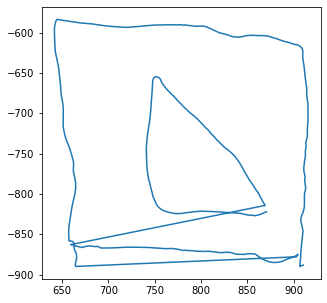

In [200]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['X'],-df['Y'])
plt.show()

In [201]:
import math

df['delta_x_y']=0.0
df['delta_time']= 0.
rows=df.shape[0]
for i in range(rows):
    q=[df['X'][i],df['Y'][i]]
    if (i==0):
        t=0.0
        p=[0,0]
    else:
        t=df['Time'][i]-df['Time'][i-1]
        p=[df['X'][i-1],df['Y'][i-1]]
    
    df['delta_x_y'][i]=math.dist(p, q)
    df['delta_time'][i]=t
df['delta_x_y'][0]=0.0

df

<ipython-input-201-1cb60a89fbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_x_y']=0.0
<ipython-input-201-1cb60a89fbe1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_time']= 0.
C:\Users\ohad1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,X,Y,Pressure,TiltX,TiltY,Time,delta_x_y,delta_time
0,910.472803,888.302113,0.094224,-3875.0,-351.0,5.889594,0.000000,0.000000
1,910.472803,888.302113,0.099107,-3875.0,-351.0,5.905226,0.000000,0.015633
2,910.472803,888.302113,0.123278,-3875.0,-351.0,5.920850,0.000000,0.015624
3,910.472803,888.302113,0.129137,-3875.0,-351.0,5.936473,0.000000,0.015624
4,909.840859,888.460099,0.137926,-3875.0,-351.0,5.952163,0.651393,0.015690
...,...,...,...,...,...,...,...,...
1178,870.186396,822.264003,0.685542,-3761.0,823.0,23.765040,0.549807,0.015612
1179,870.449706,822.264003,0.685542,-3761.0,823.0,23.765040,0.263310,0.000000
1180,870.449706,822.264003,0.682368,-3761.0,823.0,23.780675,0.000000,0.015635
1181,870.449706,822.264003,0.673579,-3761.0,823.0,23.780675,0.000000,0.000000


In [202]:
std_x_y = df['delta_x_y'].std()
std_time = df['delta_time'].std()

print(std_x_y)
print(std_time)

9.332757357114692
0.08776673991275151


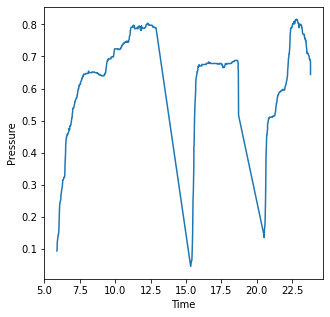

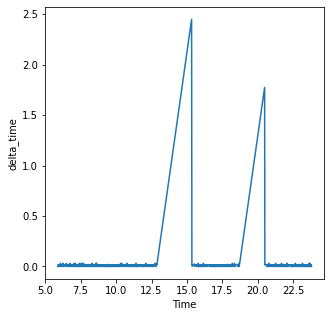

In [203]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['Pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
plt.show()

fig, ax2 = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['delta_time'])
ax2.set_xlabel('Time')
ax2.set_ylabel('delta_time')
plt.show()

In [204]:
hand_raising=min(df[df['delta_time']>std_time].count()[0], df[df['Pressure']<0.1].count()[0])
print(hand_raising, "hand raising")

2 hand raising
